# Paris House Price Prediction

##### Paris house price prediction dataset is  created from imaginary data of house prices in an urban environment - Paris. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge. This dataset includes house the columns like squaremeters, number of rooms in the house, is their yard in the house?, is their pool in the house number of previous owners? etc.

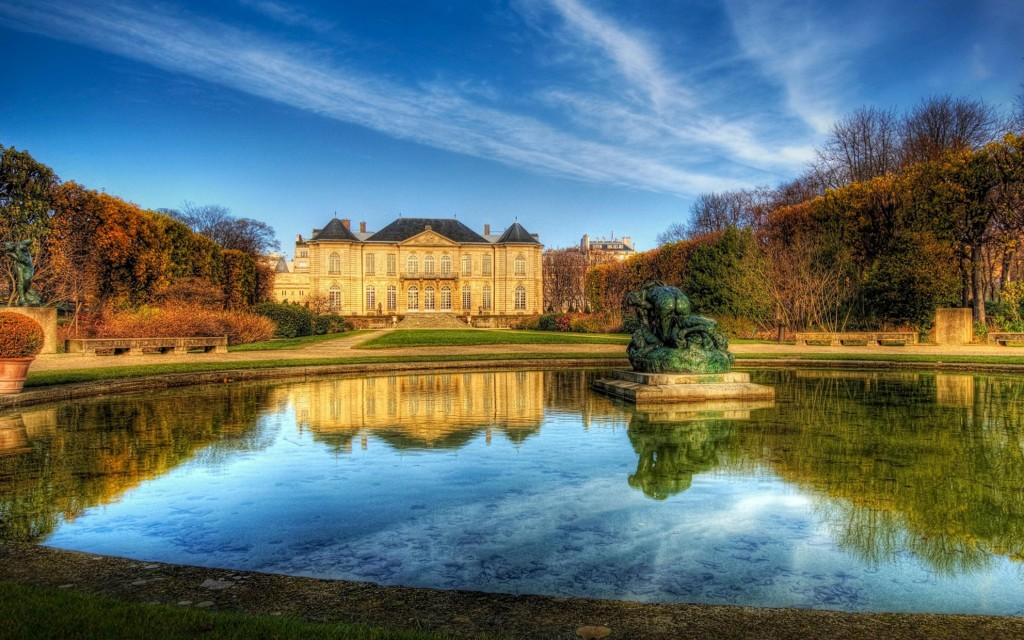

### Importing Libraries

In [1]:
import pandas as pd                # For Data Manipulation
import numpy as np                 # For Numerical Operations

# For Data Visulisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Ignoring Warnings 
import warnings
warnings.filterwarnings('ignore')

# For Splitting the Training & Testing Data & for Finding the Cross Validation Score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,RobustScaler      # For Label Encoding & For Scaling 

# For Finding R2 Score, Mean Absolute Error & Mean Squared Error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Regressors Used for Prediction
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

### Data Importing & Cleaning

In [2]:
df=pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## Exploratory Data Analysis

In [4]:
df.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [5]:
df.shape

(10000, 17)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

### Univariate Analysis

### Histplot

##### A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

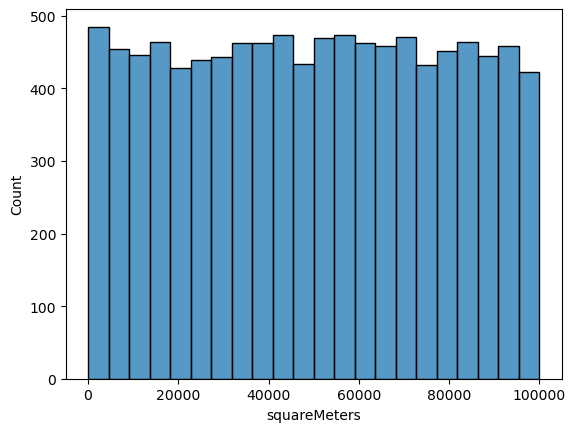

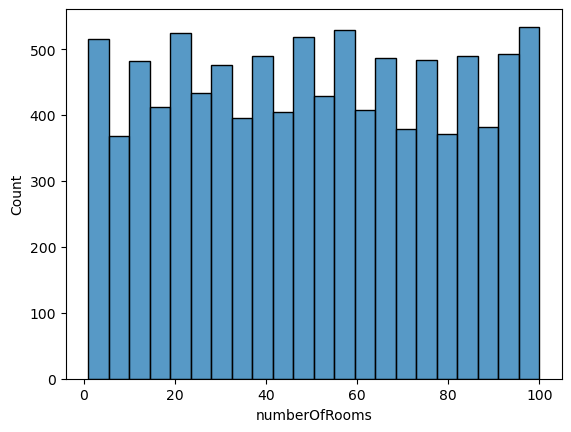

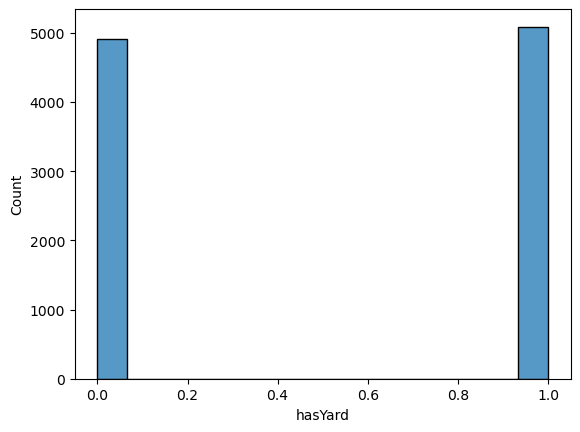

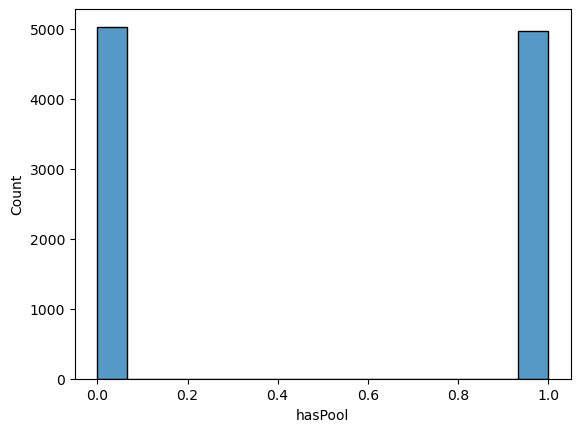

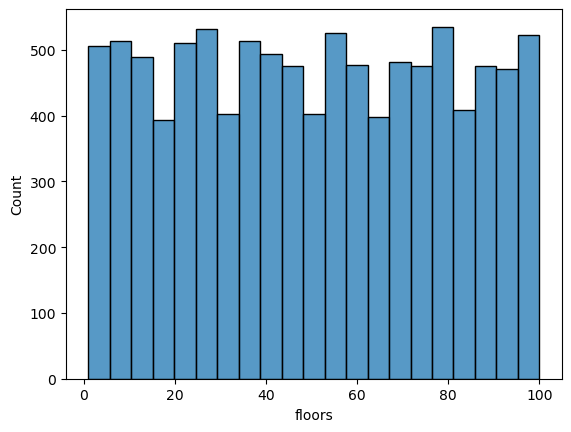

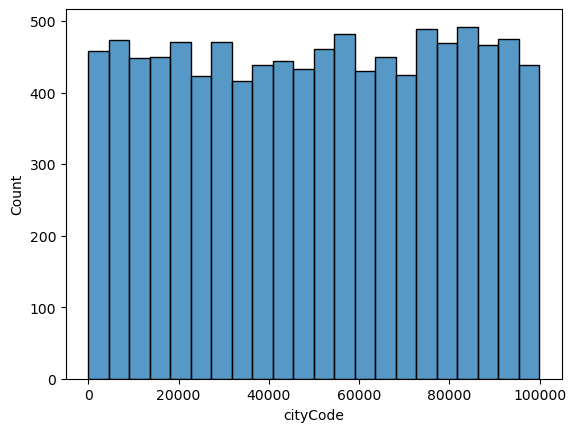

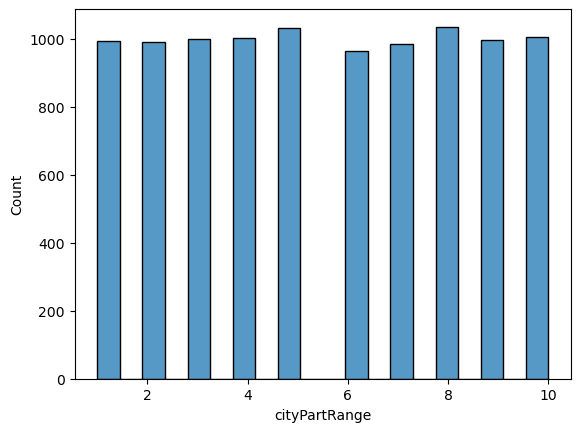

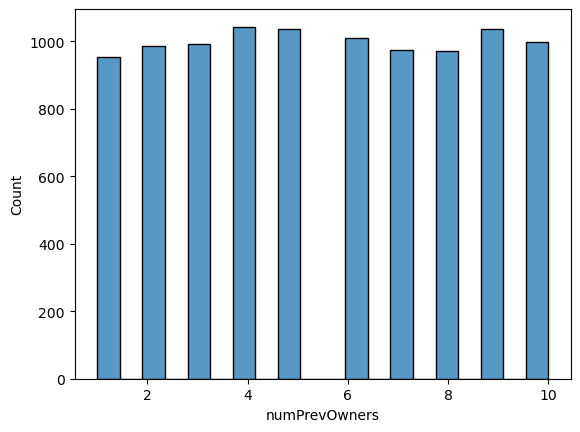

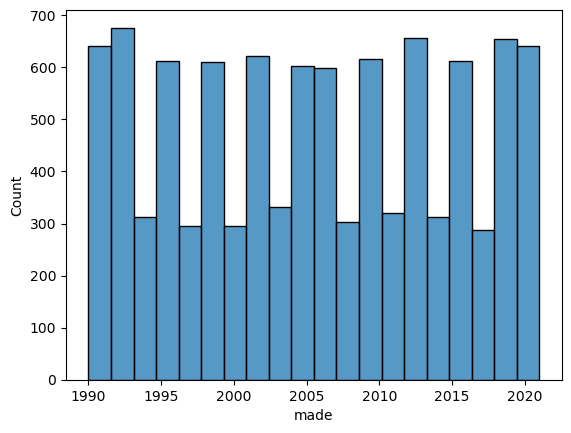

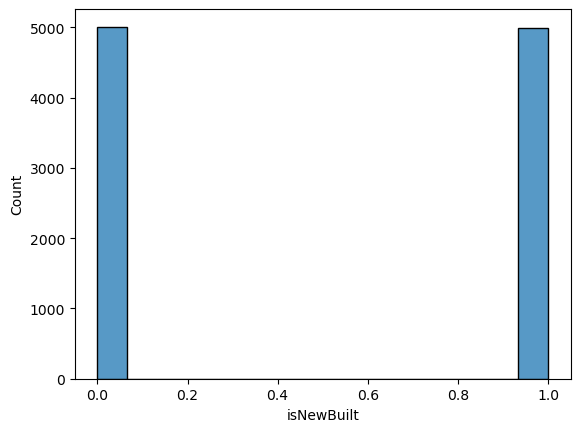

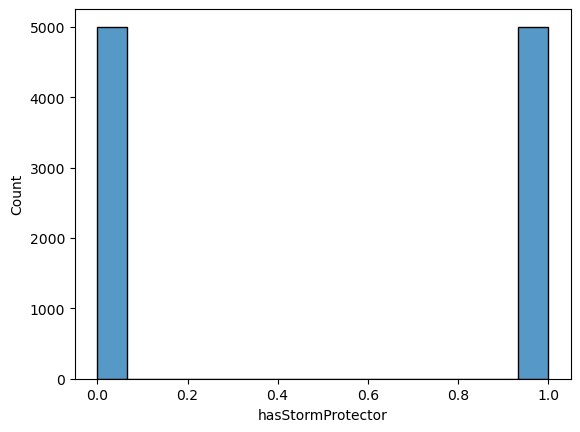

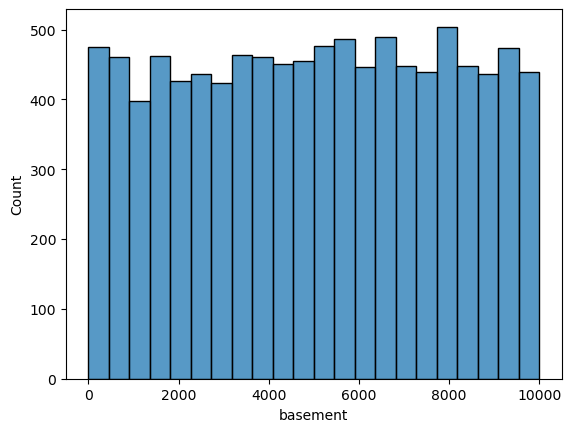

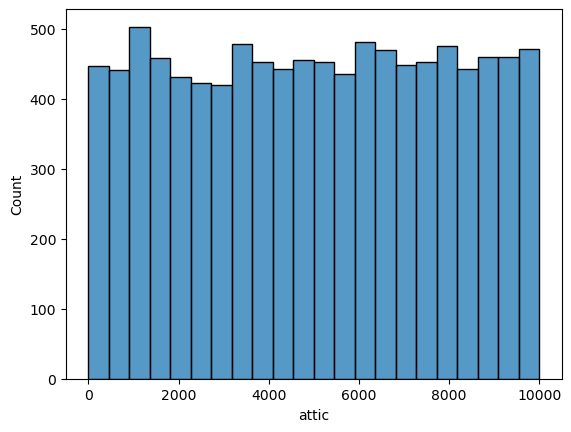

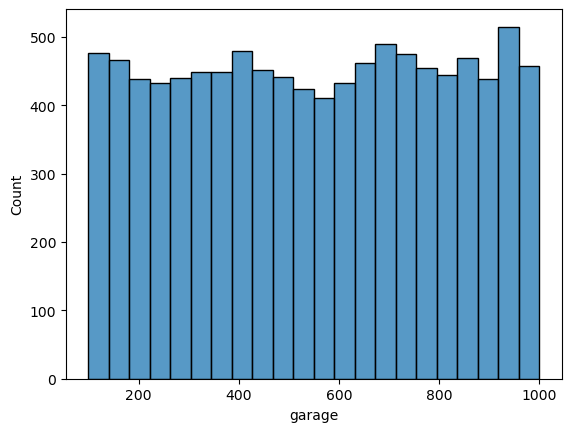

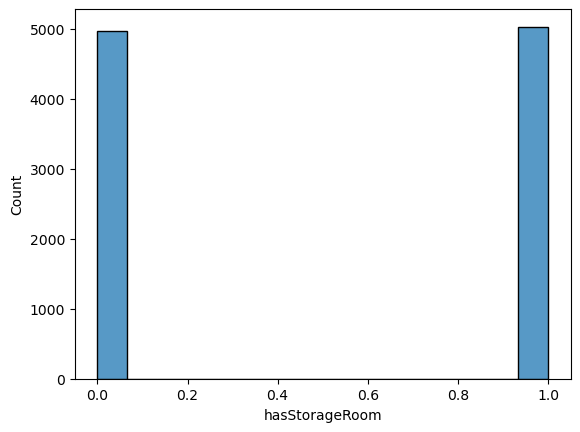

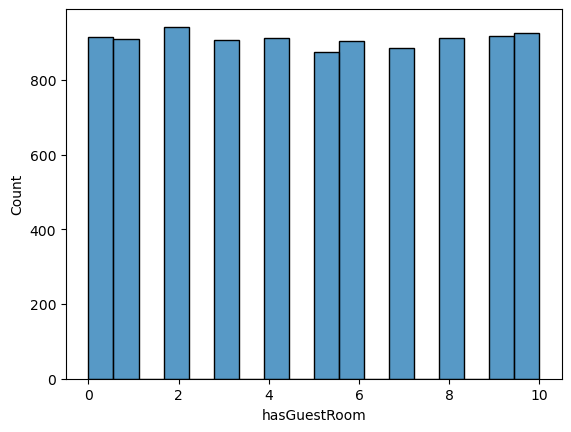

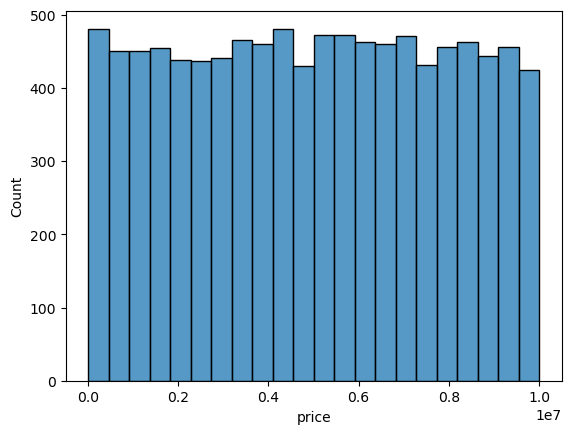

In [9]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

### KDE plot

##### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

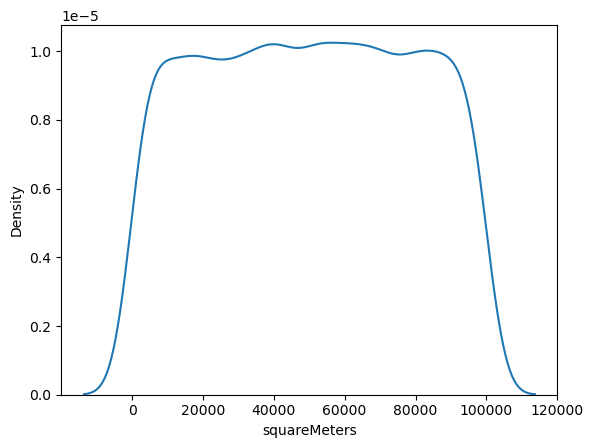

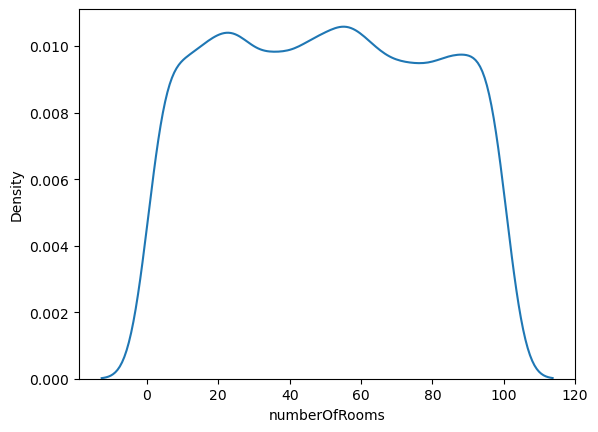

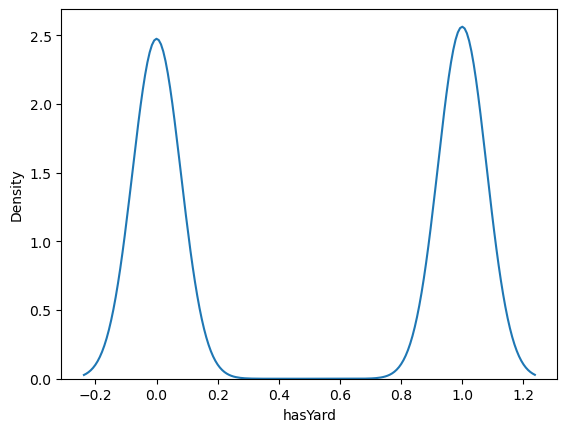

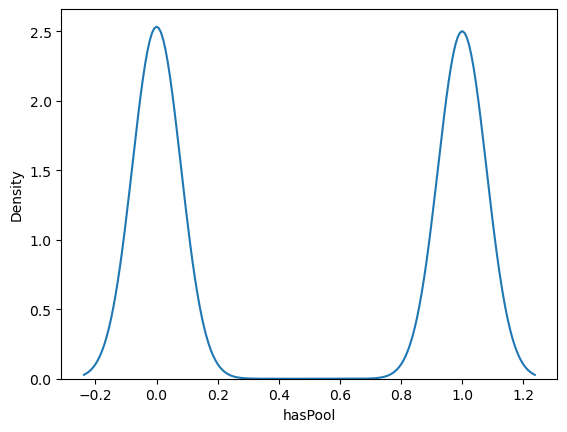

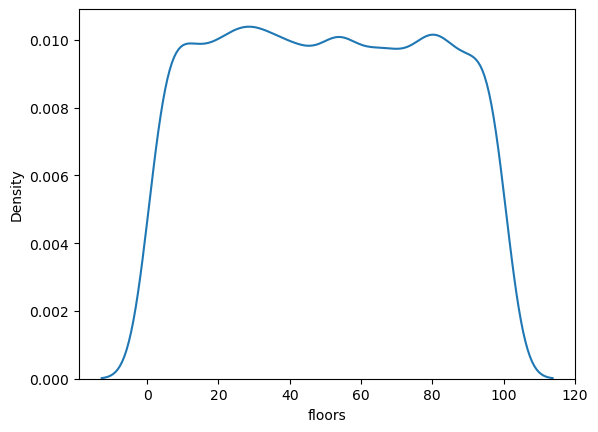

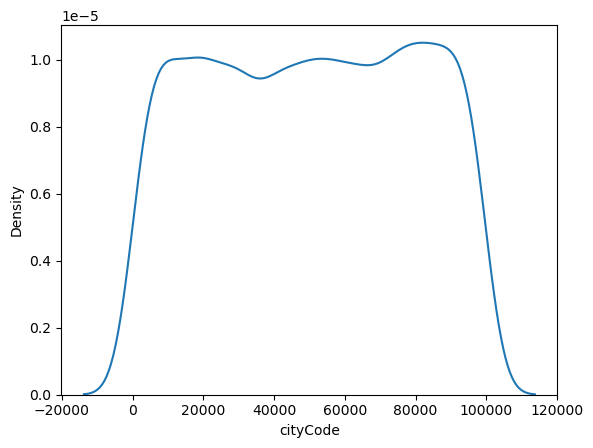

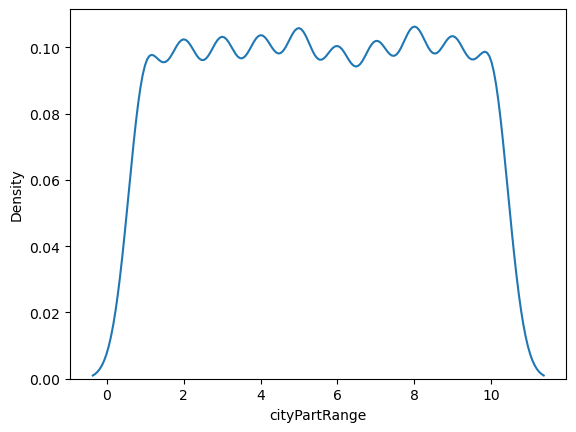

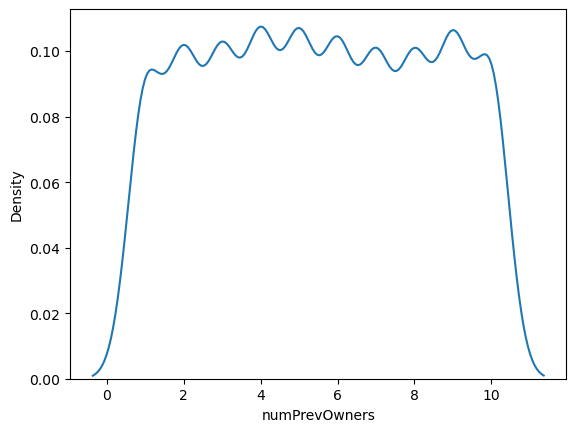

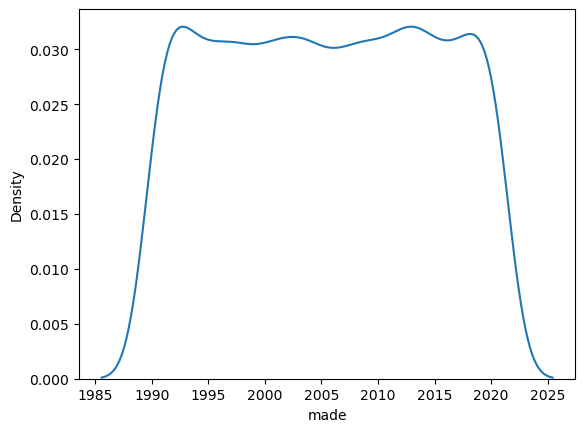

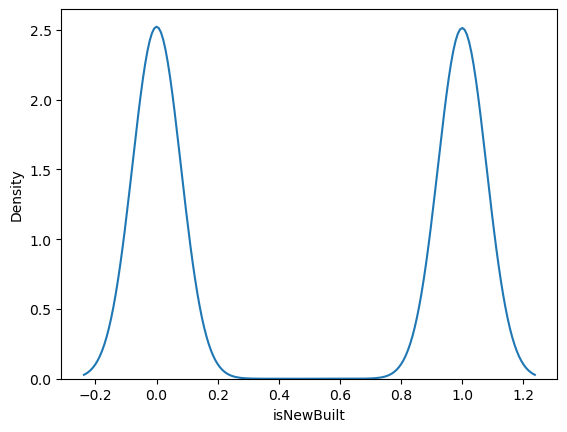

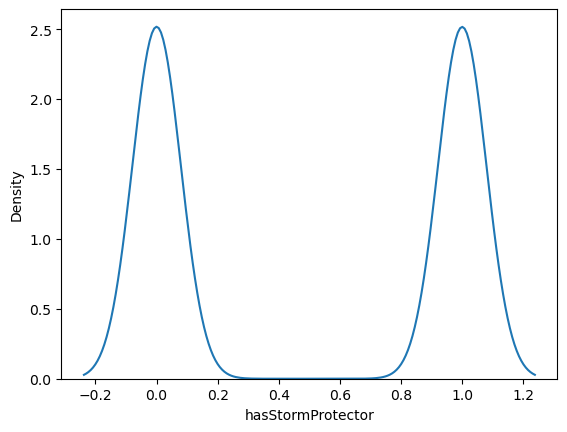

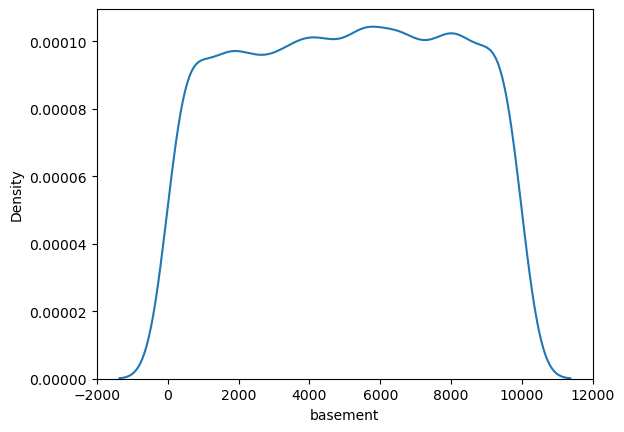

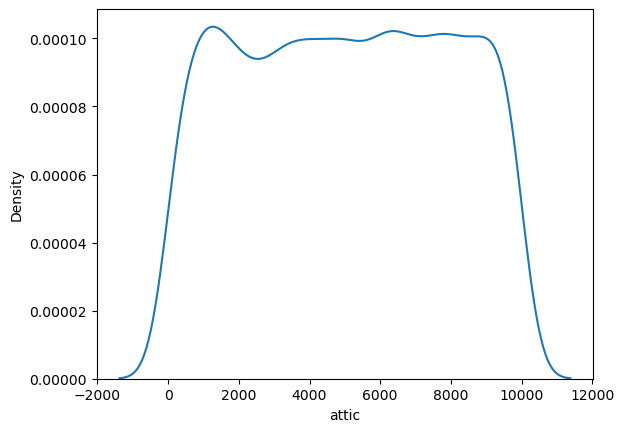

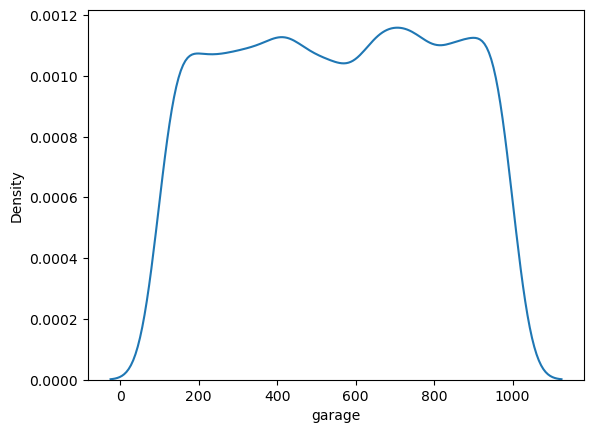

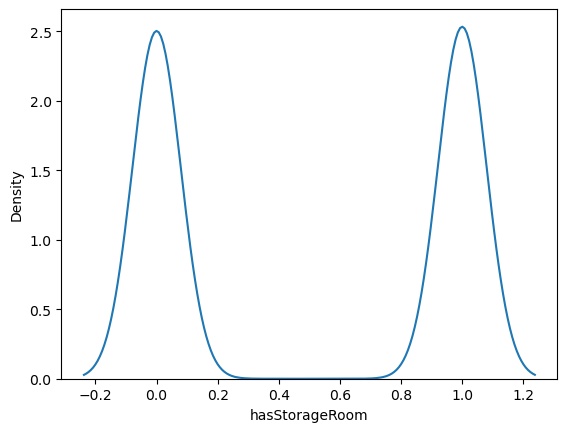

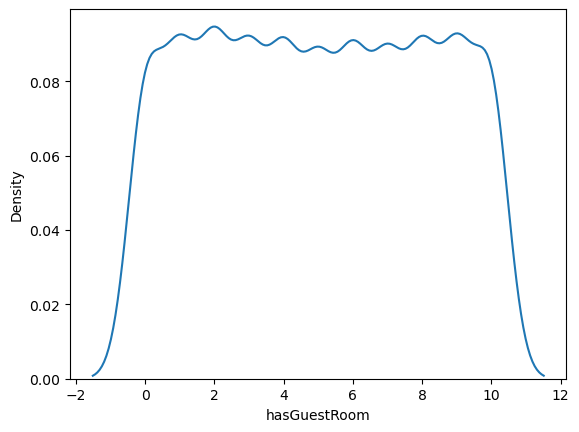

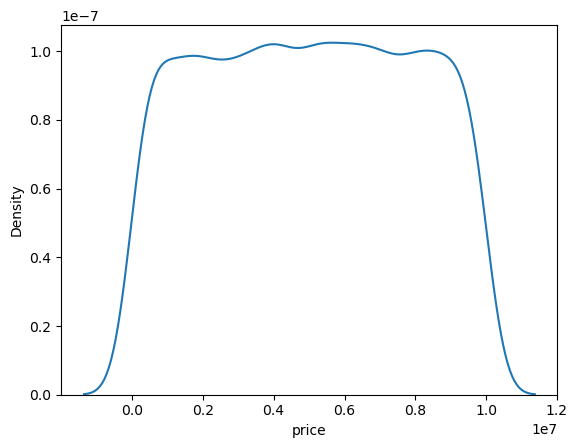

In [10]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

### Violin Plot

##### A violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region. Densities are frequently accompanied by an overlaid chart type, such as box plot, to provide additional information.

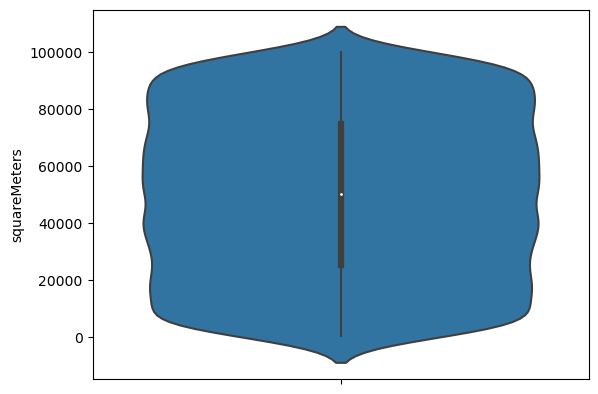

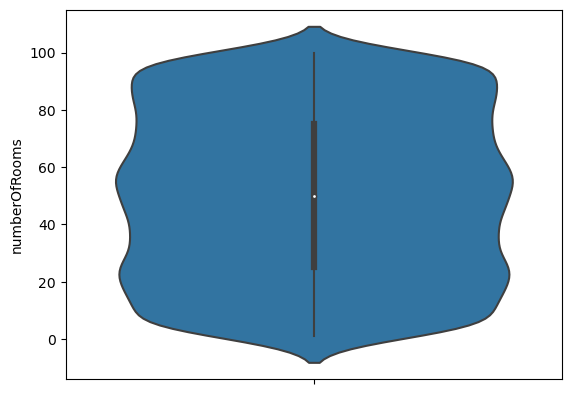

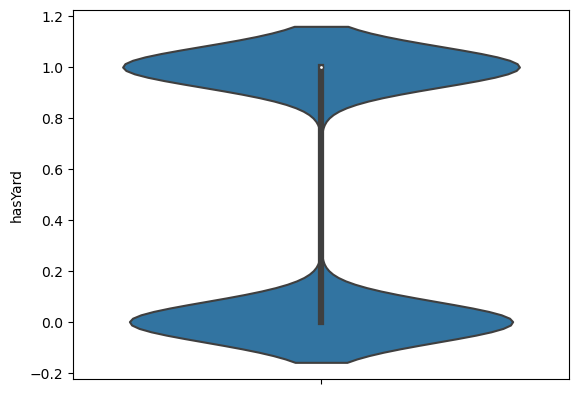

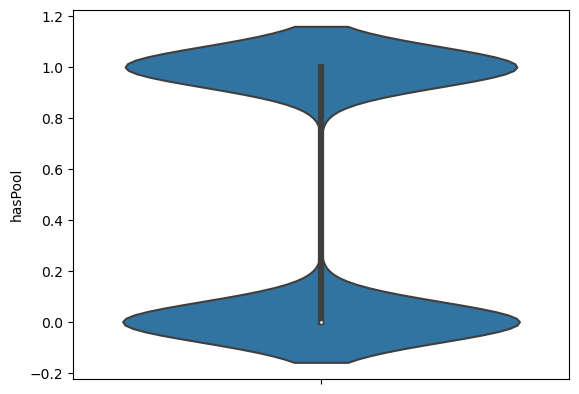

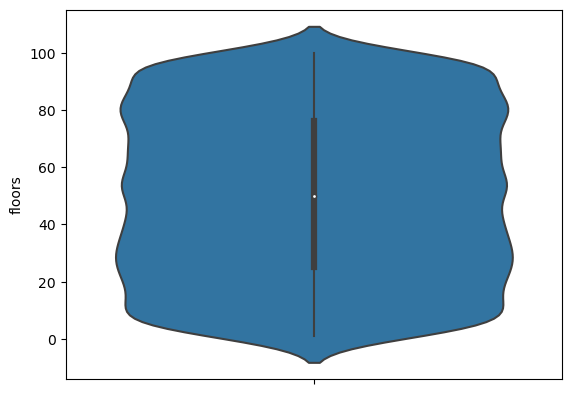

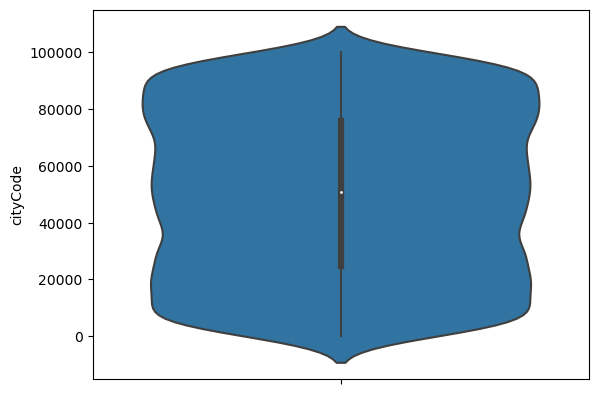

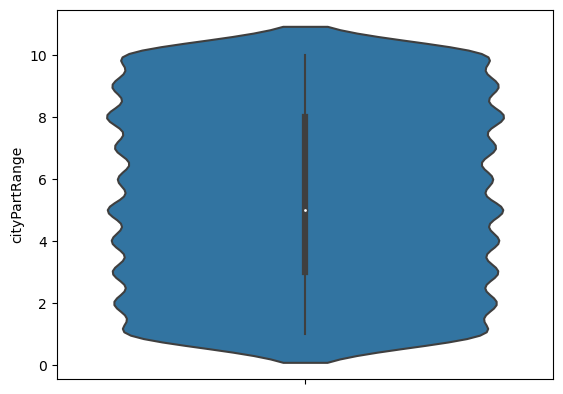

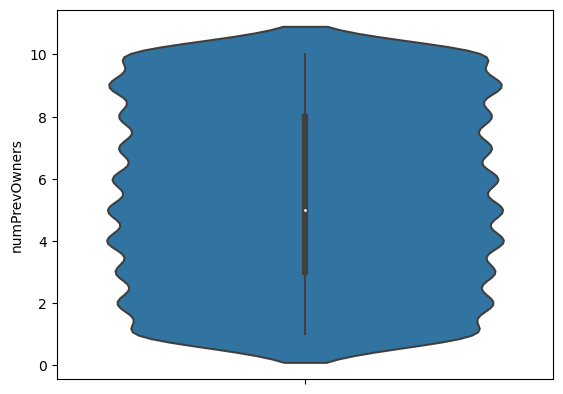

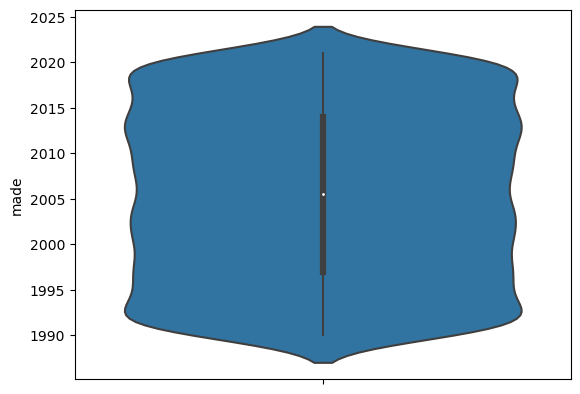

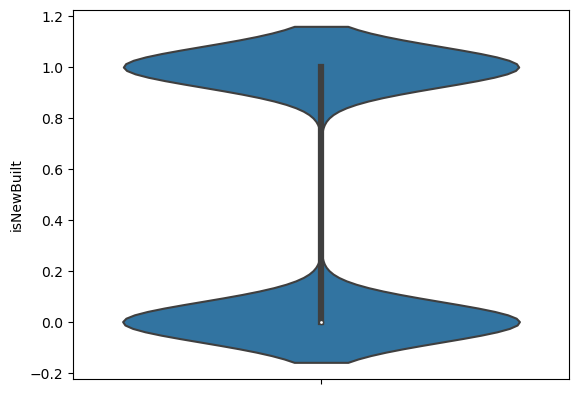

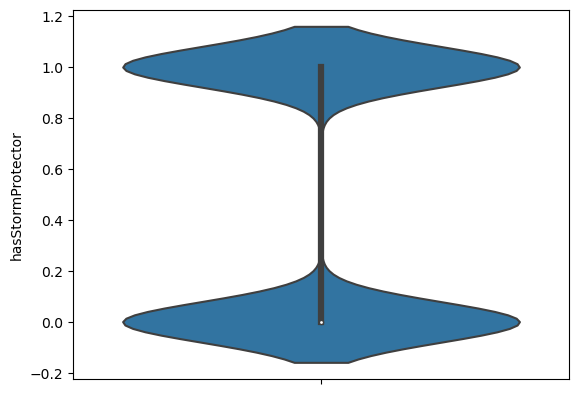

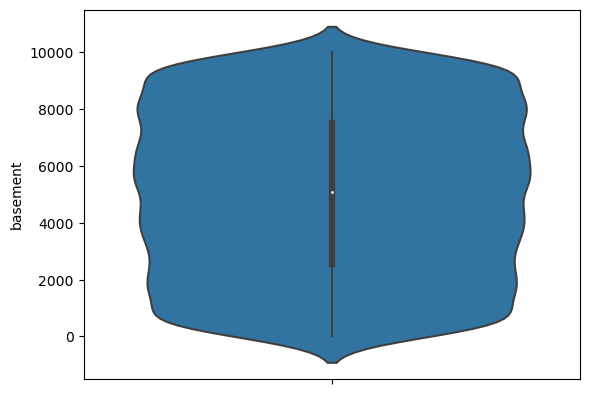

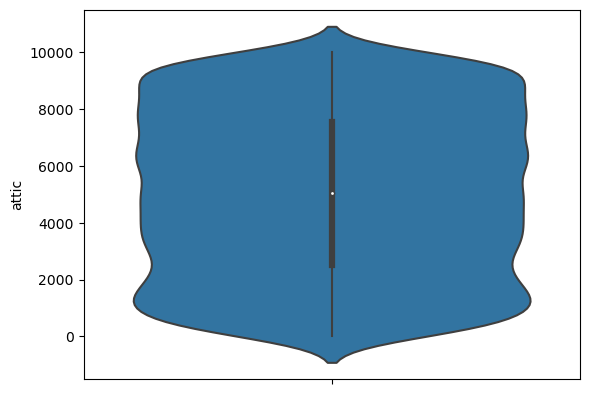

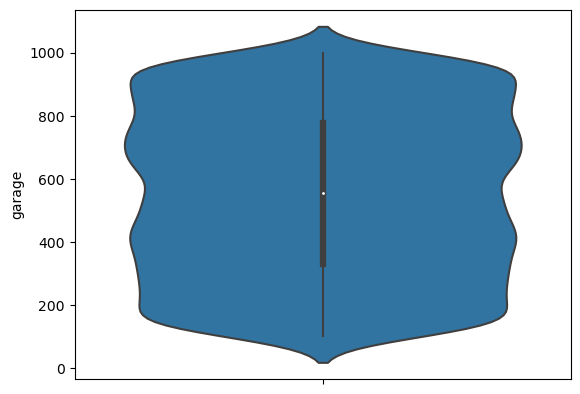

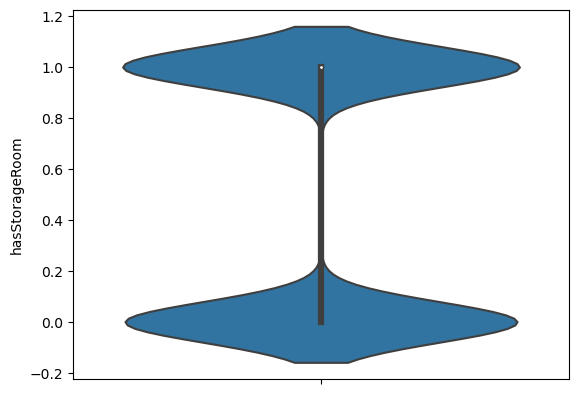

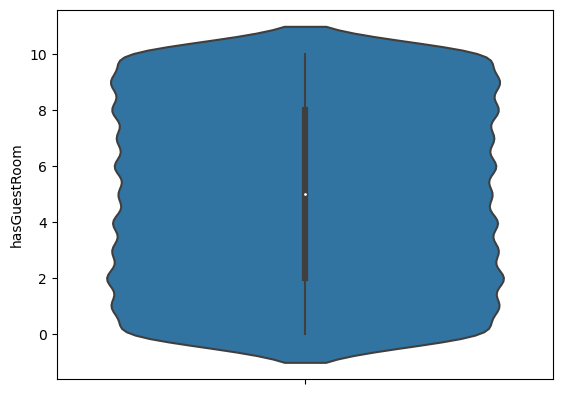

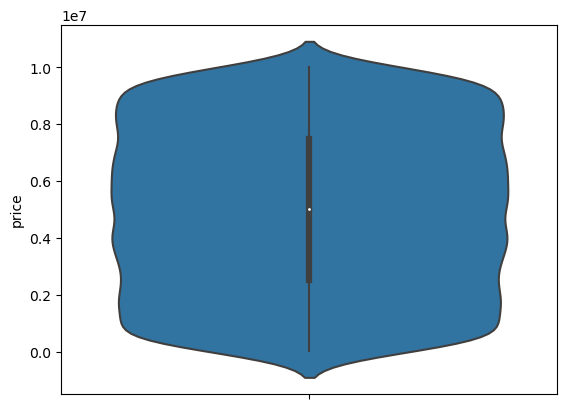

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.violinplot(y=df[i])
        plt.show();

### Displot

##### This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. 

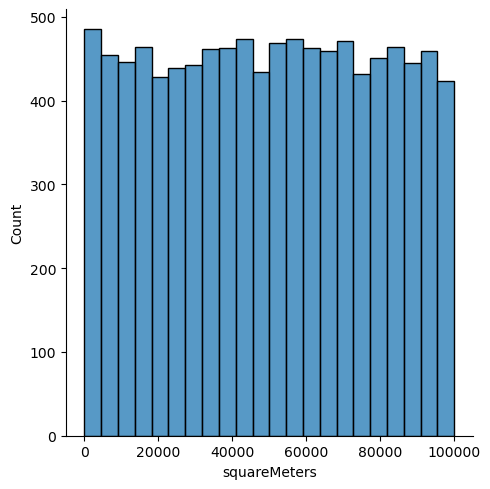

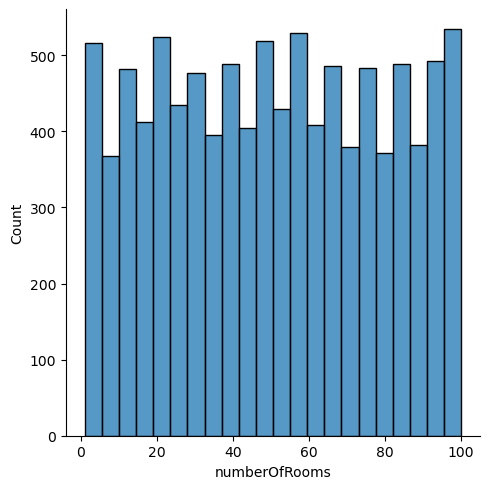

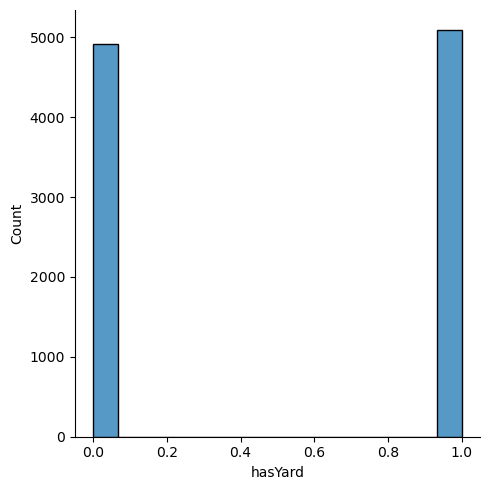

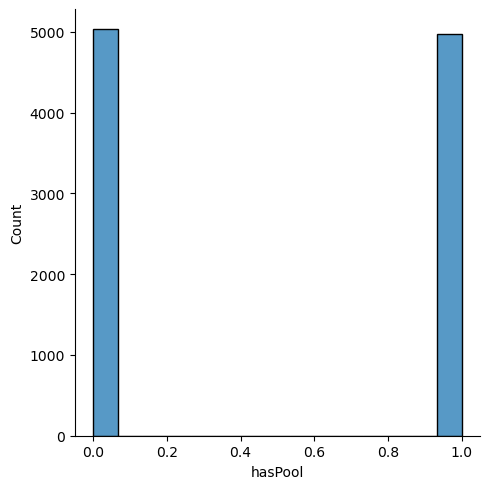

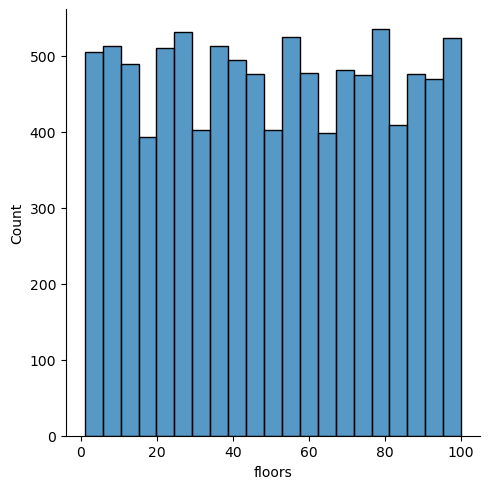

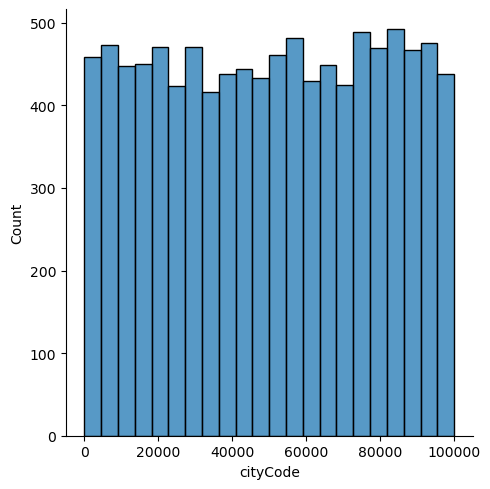

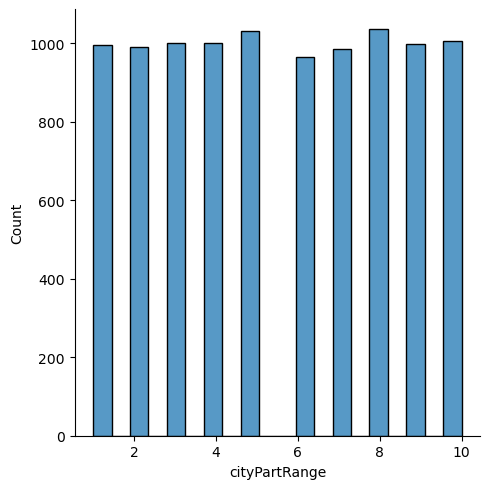

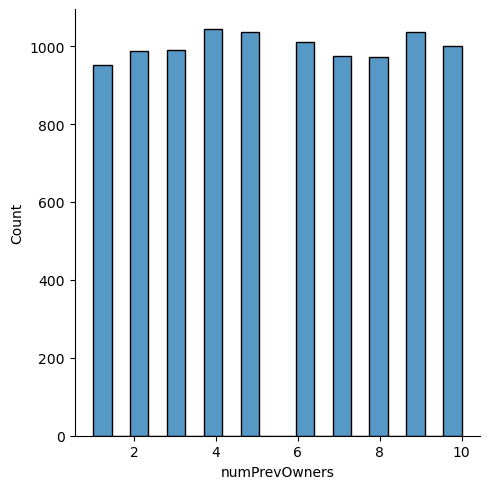

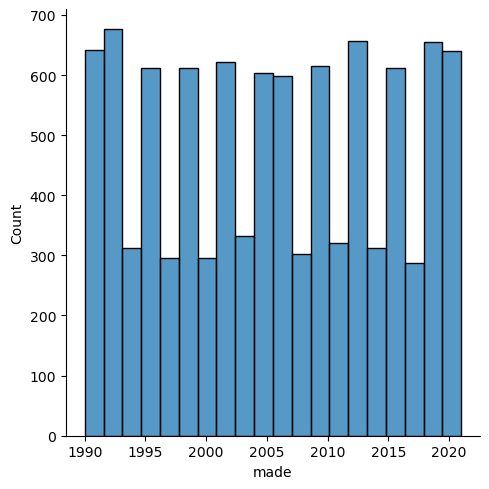

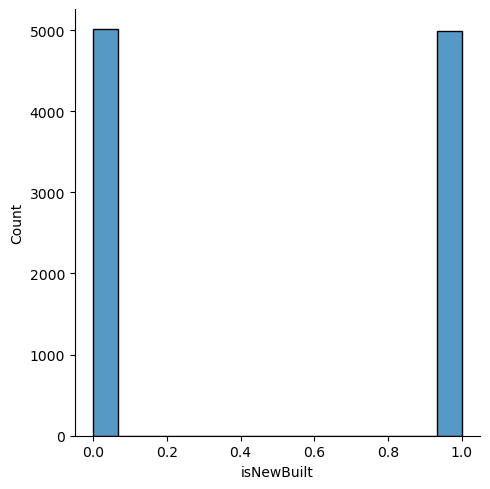

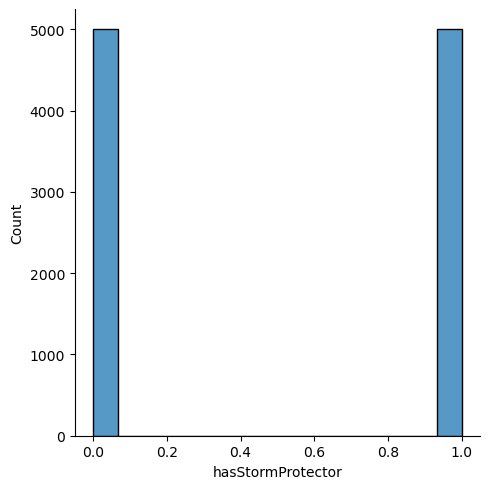

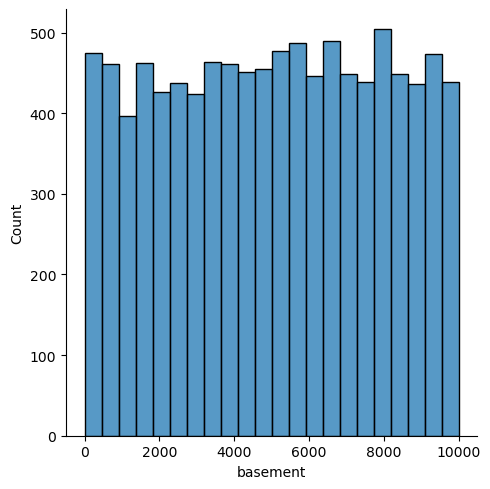

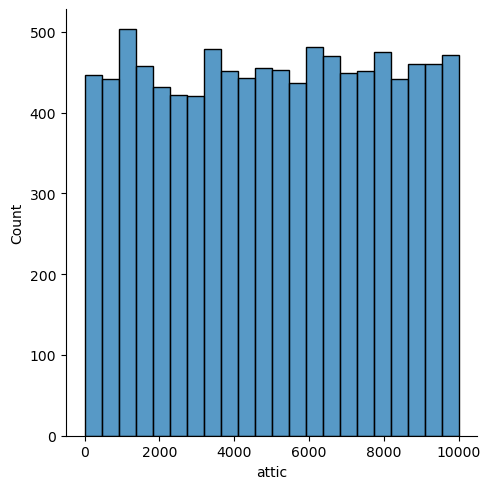

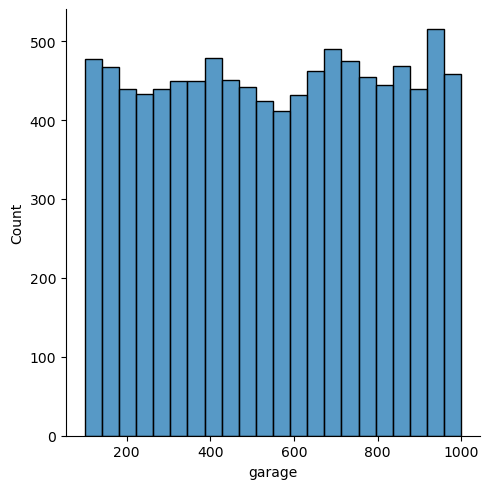

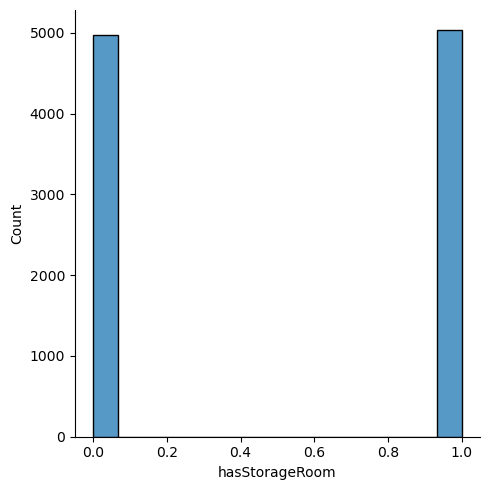

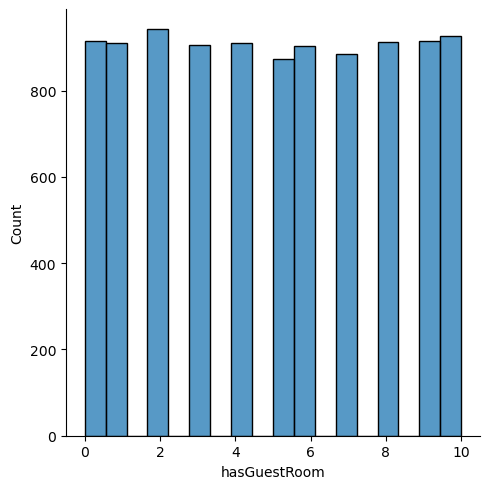

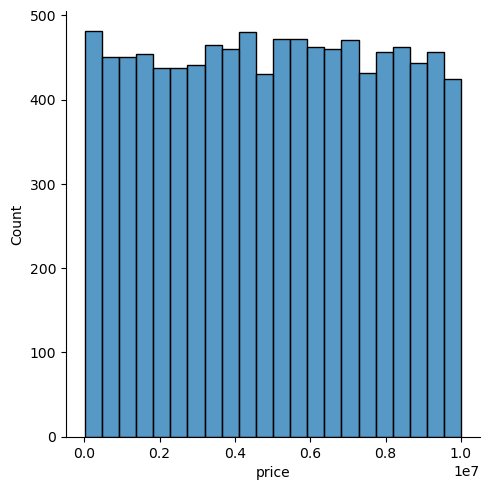

In [12]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.displot(x=df[i])
        plt.show();

### Outlier Treatment

##### First we need to plot the boxplot for finding the outliers

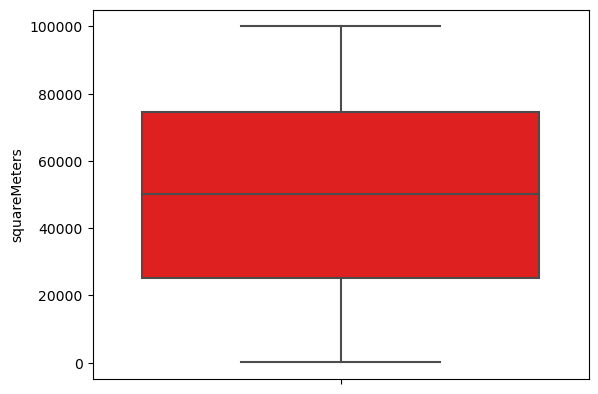

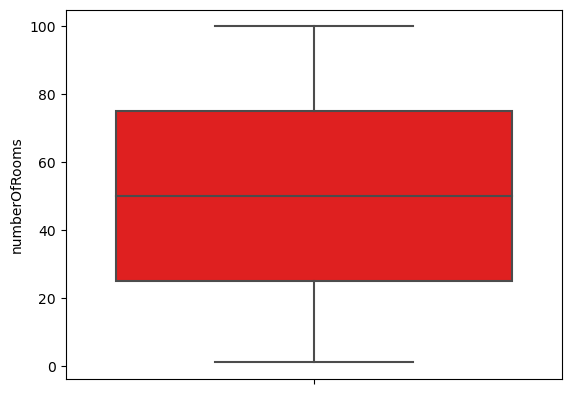

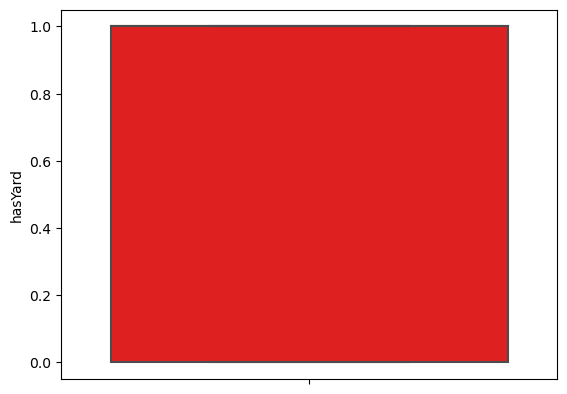

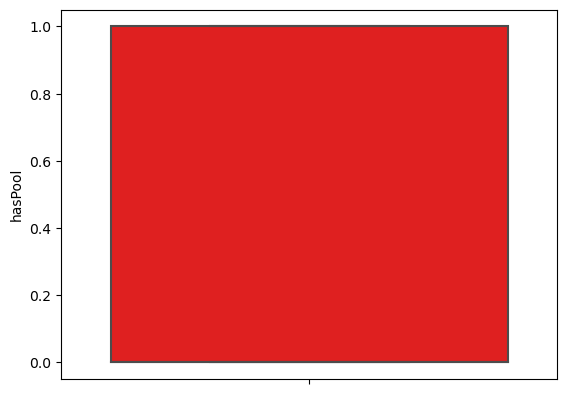

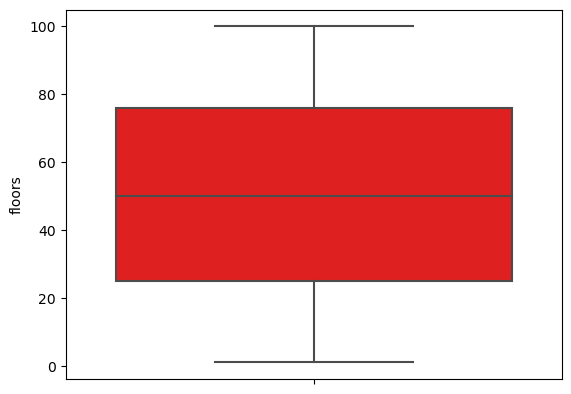

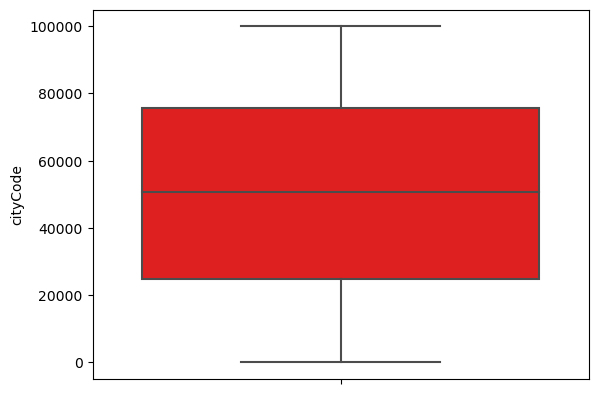

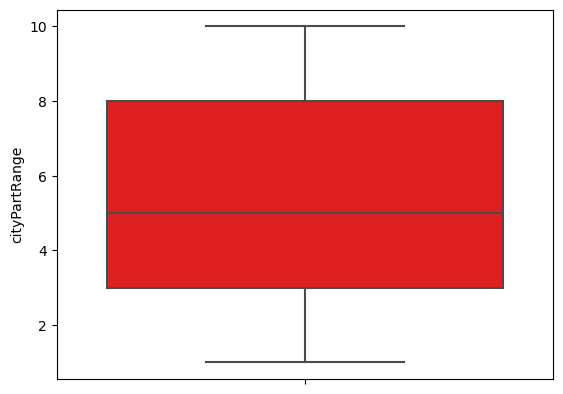

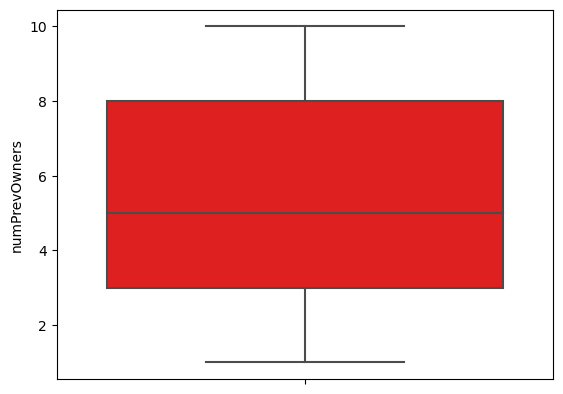

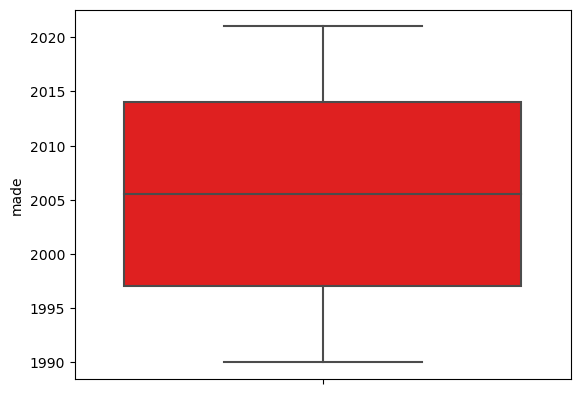

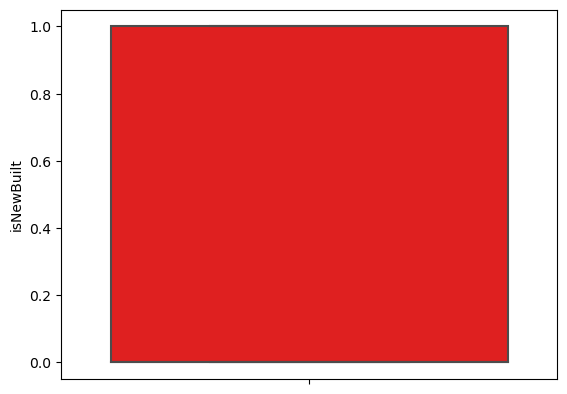

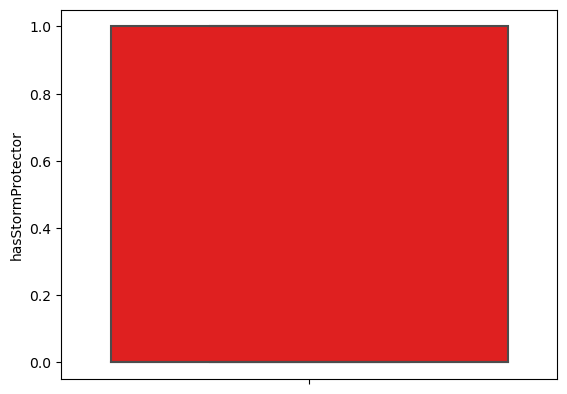

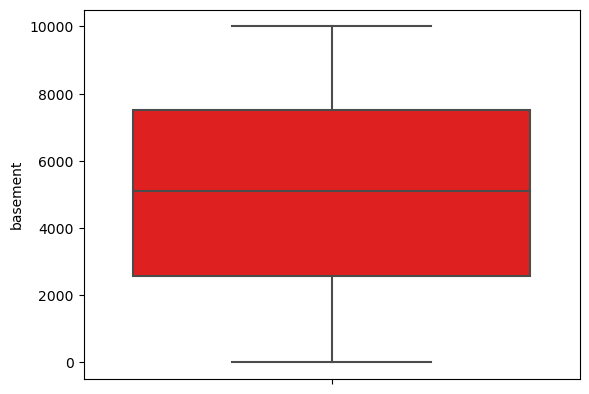

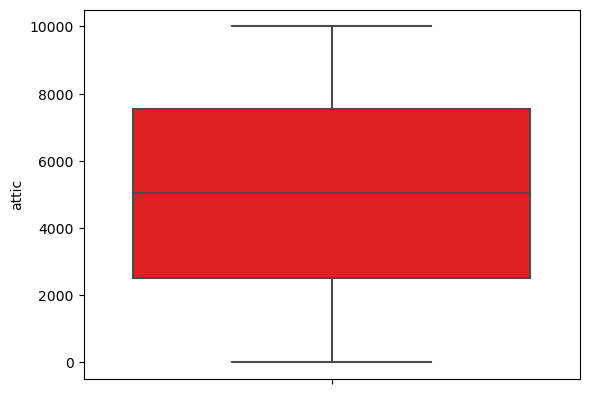

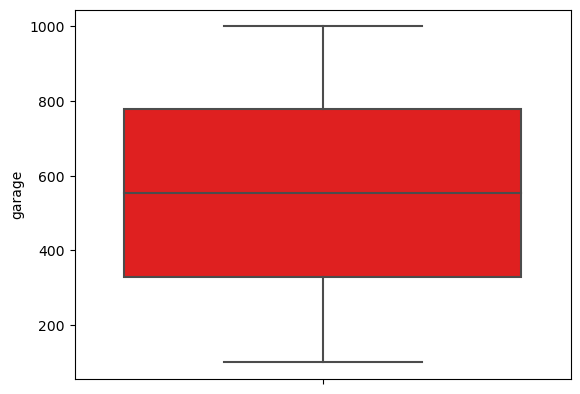

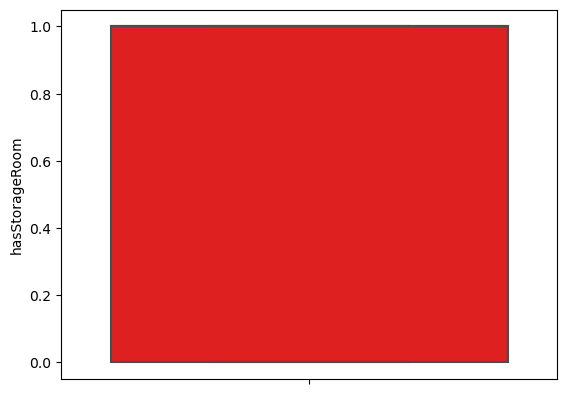

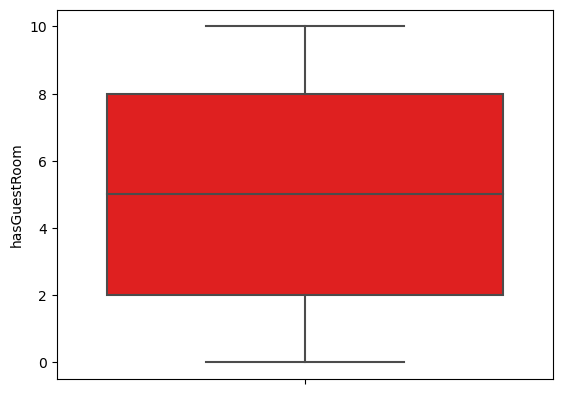

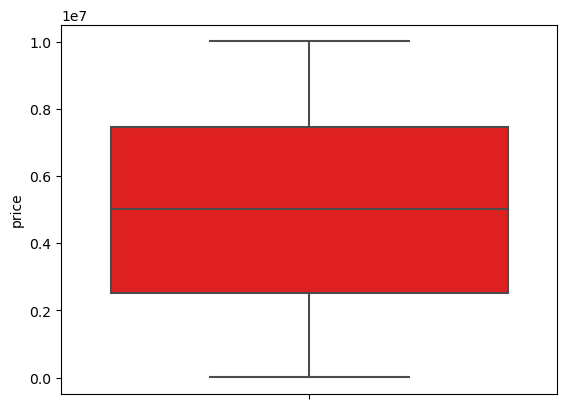

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show();

#### No outliers in this data. So we does not need to do the outlier treatment

### Multivariate Analysis

### Barplot

##### A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.

<Figure size 4000x2000 with 0 Axes>

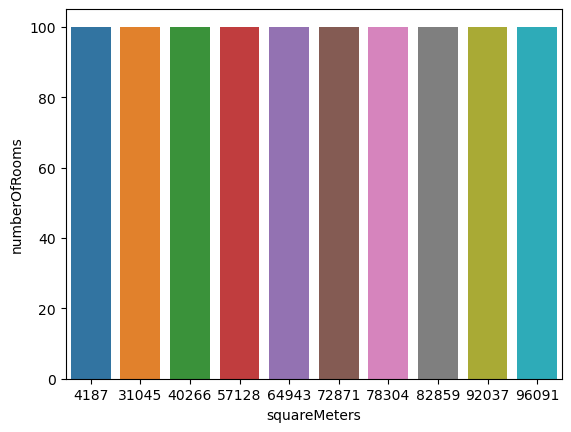

<Figure size 4000x2000 with 0 Axes>

In [14]:
sns.barplot(x='squareMeters',y='numberOfRooms',data=df.sort_values(by='numberOfRooms',ascending=False)[:10]);
plt.figure(figsize=(40,20))

### Lineplot

##### A line plot is a way to display data along a number line. Line plots are also called dot plots.

<Axes: xlabel='price', ylabel='squareMeters'>

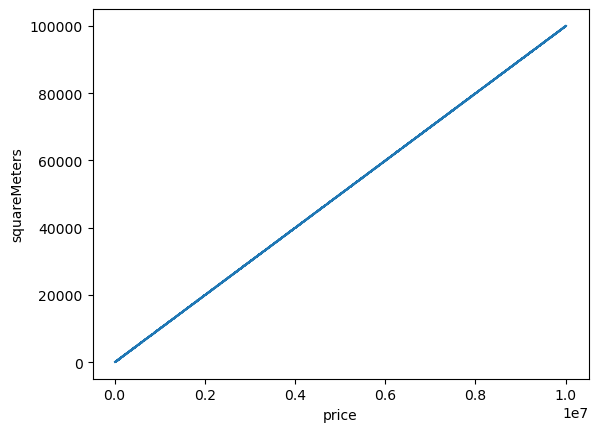

In [15]:
sns.lineplot(y='squareMeters', x='price', data=df)

### Regplot

##### Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

<Axes: xlabel='numberOfRooms', ylabel='price'>

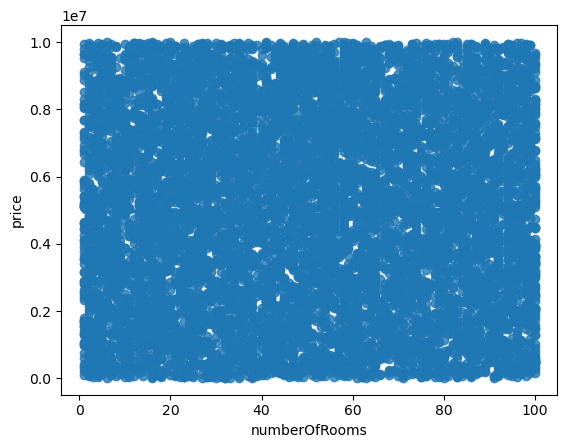

In [16]:
sns.regplot(y=df['price'], x=df['numberOfRooms'])

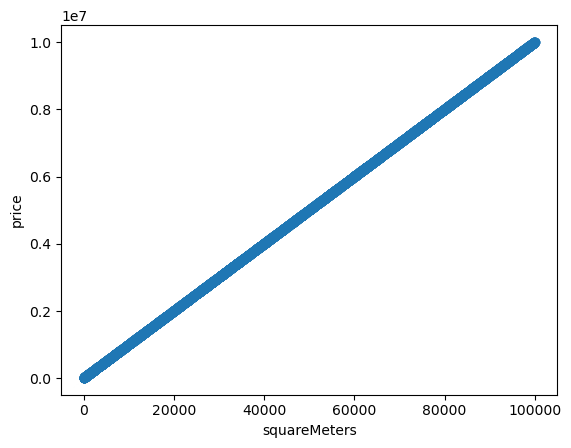

In [17]:
sns.regplot(y=df['price'], x=df['squareMeters']);

#### Heatmap

##### A heatmap (aka heat map) depicts values for a main variable of interest across two axis variables as a grid of colored squares. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range.

<Axes: >

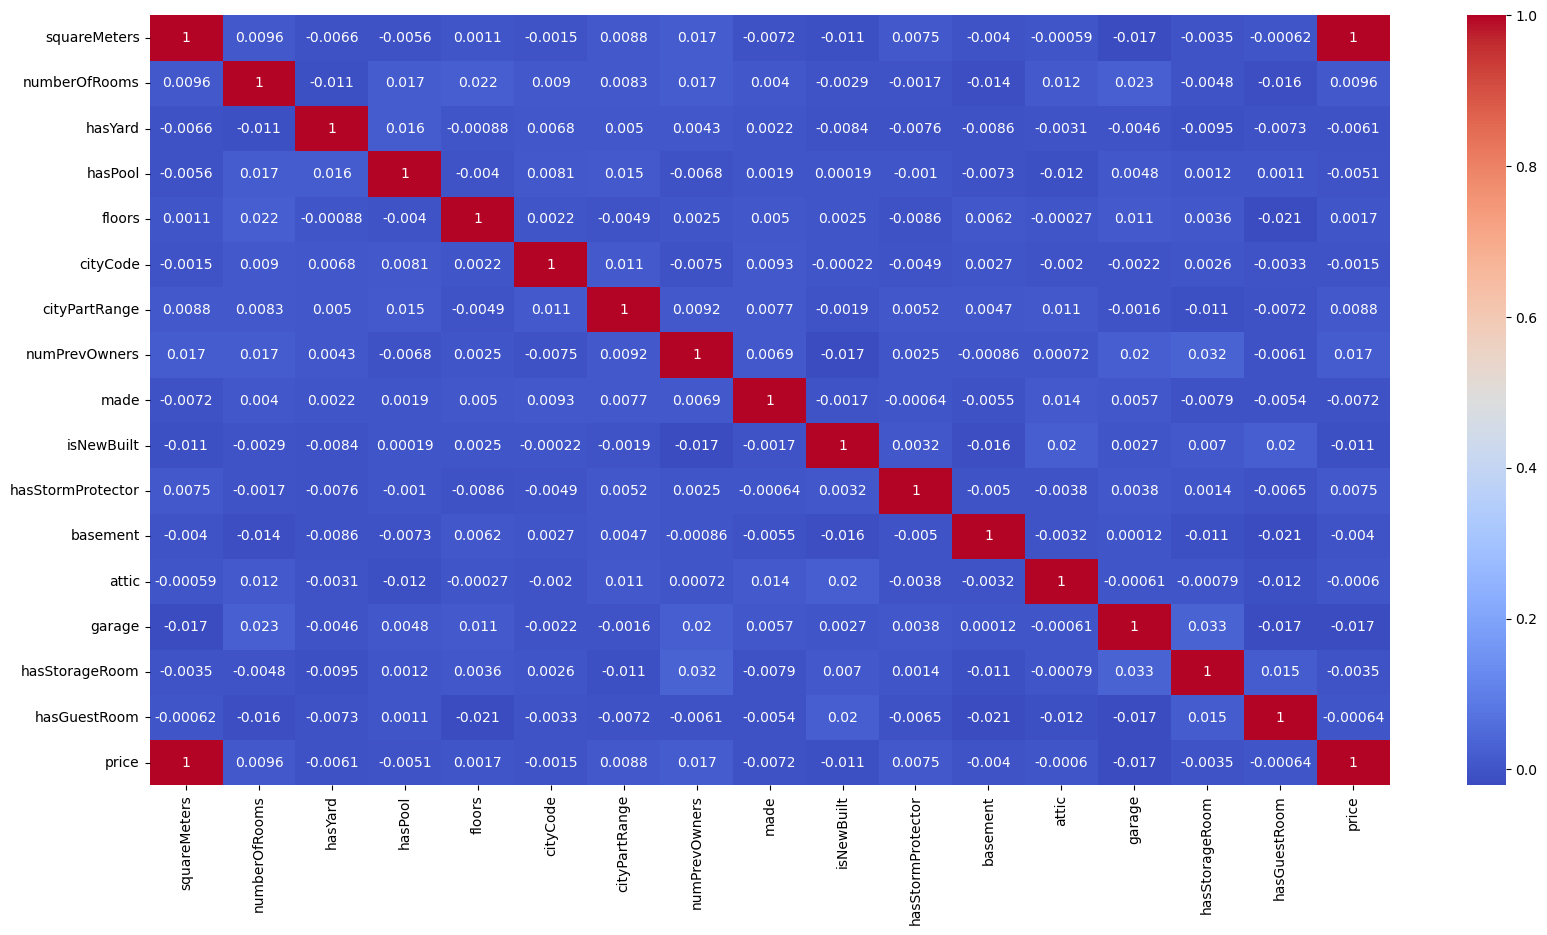

In [18]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Correlation 

##### Finding correlation between columns using Heatmap

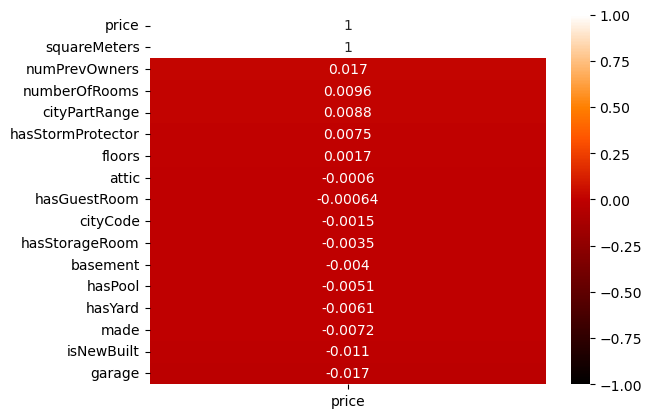

In [19]:
sns.heatmap(df.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap='gist_heat');

### Cross Validation

##### Choosing x & y 

In [20]:
# Choosing dependend & independent variables

x=df[['squareMeters','numPrevOwners','numberOfRooms','cityPartRange','hasStormProtector','floors']].values
y=df[['price']].values

##### Scaling & Fitting of x

##### Scaling is for normalising the range of features in dataset

In [21]:
r=RobustScaler()

In [22]:
x=r.fit_transform(x)

##### Finding the Best Model

In [23]:
models={
        'LinearRegression':LinearRegression(),
        'Ridge':Ridge(),
        'LinearSVR':LinearSVR(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'AdaBoostRegressor':AdaBoostRegressor(),
        'RandomForestRegressor':RandomForestRegressor()
       }

In [24]:
for name,model in models.items():
    sc=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('cross_validation_model:{}'.format(name))
    rmse=np.sqrt(-sc)
    rmse_avg=np.mean(rmse)
    print('AVERAGE_RMSE',rmse_avg)
    print('*'*100)

cross_validation_model:LinearRegression
AVERAGE_RMSE 2856.8181047403923
****************************************************************************************************
cross_validation_model:Ridge
AVERAGE_RMSE 3009.5878495560864
****************************************************************************************************
cross_validation_model:LinearSVR
AVERAGE_RMSE 5752865.153741909
****************************************************************************************************
cross_validation_model:DecisionTreeRegressor
AVERAGE_RMSE 4951.653436234942
****************************************************************************************************
cross_validation_model:GradientBoostingRegressor
AVERAGE_RMSE 20226.39593672478
****************************************************************************************************
cross_validation_model:AdaBoostRegressor
AVERAGE_RMSE 357790.35126722563
*********************************************************************

##### Choosing the Best Model as Linear Regression 

In [25]:
model=LinearRegression()

##### Dividing The Training & Testing Data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

##### Training the Data & Displaying the Scores of Different Tests

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
training_score = model.score(x_train, y_train)*100
training_score

99.99990138757472

In [29]:
testing_score=model.score(x_test,y_test)*100
testing_score

99.99990099279132

In [30]:
R2_score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
print('R2_score is',R2_score)
print('MAE is',mae)
print('MSE is',mse)

R2_score is 99.99990099279132
MAE is 2316.298584464783
MSE is 8146158.342063284


##### Y_Prediction

In [31]:
y_pred = model.predict(x)
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTION'),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,7559081.5,7.559139e+06
1,8085989.5,8.085867e+06
2,5574642.1,5.575696e+06
3,3232561.2,3.235829e+06
4,7055052.0,7.051038e+06


##### Displaying the resulting using scatterplot

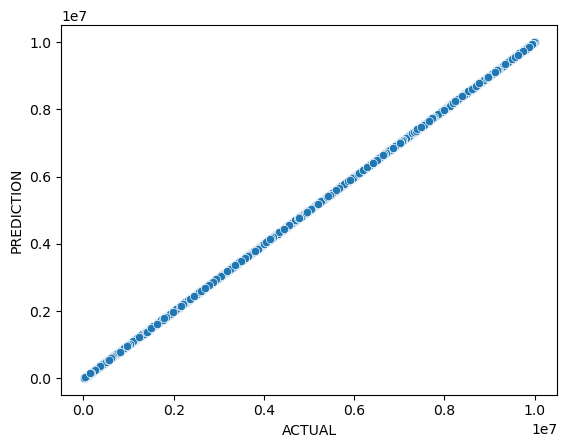

In [32]:
sns.scatterplot(data=OUTPUT,x='ACTUAL',y='PREDICTION');

##### Displaying the Score of the Model

In [33]:
model.score(x,y)

0.9999990108658329